## Preprocessing

In [ ]:
  # Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Neural networks
import tensorflow as tf

In [ ]:
#  Import and read the charity_data.csv.
import pandas as pd
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# review our data for any cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [ ]:
# Review if scaling will be needed
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns= ['EIN','NAME'])

In [ ]:
 # Determine the number of unique values in each column.
 cat_cols = df.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

APPLICATION_TYPE
17
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

AFFILIATION
6
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

CLASSIFICATION
71
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

USE_CASE
5
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

ORGANIZATION
4
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: i

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
df_apps = df.APPLICATION_TYPE.value_counts()
application_types_to_replace= list(df_apps.loc[df_apps < 500].index)
# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df.CLASSIFICATION.value_counts().loc[df.CLASSIFICATION.value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
df_class = df.CLASSIFICATION.value_counts()
classifications_to_replace = list(df_class.loc[df_class < 500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
dfp = pd.get_dummies(df)
dfp.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# features dont appear to correlate well
corrs = dfp.corr()
corrs["IS_SUCCESSFUL"].sort_values(ascending=False)

IS_SUCCESSFUL                   1.000000
AFFILIATION_Independent         0.368322
ORGANIZATION_Trust              0.162164
CLASSIFICATION_C7000            0.110084
APPLICATION_TYPE_T5             0.088575
APPLICATION_TYPE_T10            0.086805
APPLICATION_TYPE_T6             0.079817
INCOME_AMT_1-9999               0.067058
CLASSIFICATION_C1000            0.062589
CLASSIFICATION_Other            0.055117
ORGANIZATION_Co-operative       0.053520
APPLICATION_TYPE_Other          0.045165
INCOME_AMT_10000-24999          0.036937
INCOME_AMT_100000-499999        0.030542
INCOME_AMT_25000-99999          0.026239
USE_CASE_Preservation           0.024145
ORGANIZATION_Corporation        0.016690
AFFILIATION_Other               0.010121
APPLICATION_TYPE_T7             0.009752
USE_CASE_Other                  0.008765
SPECIAL_CONSIDERATIONS_Y        0.005469
AFFILIATION_National            0.004581
AFFILIATION_Regional            0.003238
AFFILIATION_Family/Parent       0.002608
CLASSIFICATION_C

In [ ]:
# Split our preprocessed data into our features and target arrays
X = dfp.drop(columns=["IS_SUCCESSFUL"])
y = dfp["IS_SUCCESSFUL"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Split the preprocessed data into a training and testing dataset


(25724, 44) (25724,)
(8575, 44) (8575,)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[ 8015  4013]
 [ 3035 10661]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.69     12028
           1       0.73      0.78      0.75     13696

    accuracy                           0.73     25724
   macro avg       0.73      0.72      0.72     25724
weighted avg       0.73      0.73      0.72     25724


TESTING SET METRICS
[[2624 1386]
 [1023 3542]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.69      4010
           1       0.72      0.78      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575



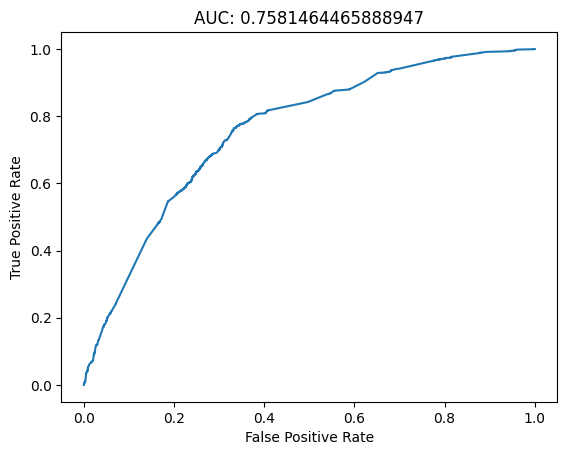

In [ ]:
 # init the model
lr = LogisticRegression()
doMLClassification(lr, X_train_scaled, y_train, X_test_scaled, y_test)

TRAINING SET METRICS
[[ 9592  2436]
 [ 2246 11450]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80     12028
           1       0.82      0.84      0.83     13696

    accuracy                           0.82     25724
   macro avg       0.82      0.82      0.82     25724
weighted avg       0.82      0.82      0.82     25724


TESTING SET METRICS
[[2708 1302]
 [1198 3367]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      4010
           1       0.72      0.74      0.73      4565

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575



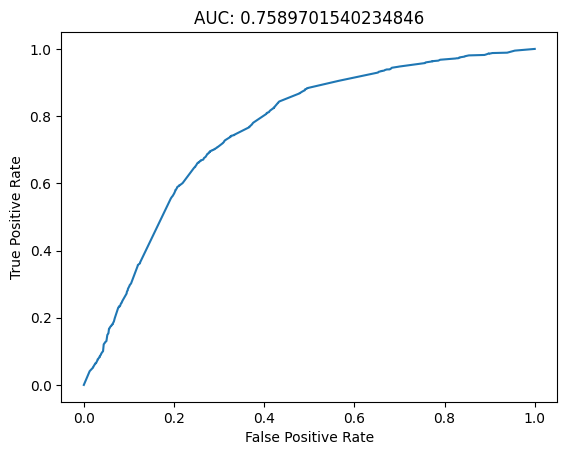

In [ ]:
# Random forest slightly overfits and not as good as the LR
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train_scaled, y_train, X_test_scaled, y_test)

TRAINING SET METRICS
[[ 8515  3513]
 [ 2638 11058]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73     12028
           1       0.76      0.81      0.78     13696

    accuracy                           0.76     25724
   macro avg       0.76      0.76      0.76     25724
weighted avg       0.76      0.76      0.76     25724


TESTING SET METRICS
[[2661 1349]
 [1024 3541]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      4010
           1       0.72      0.78      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575



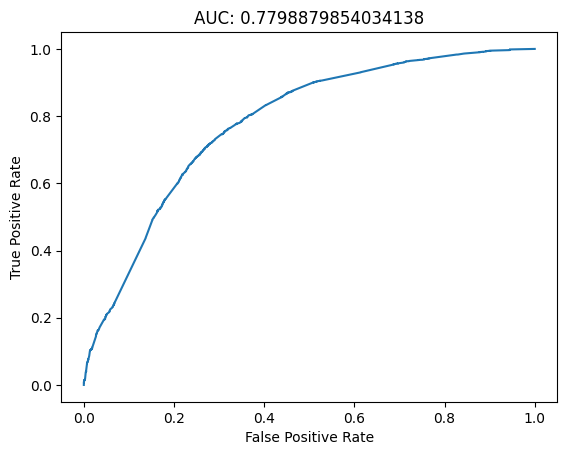

In [43]:
#LGBM Best AUC ,
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 360       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6164 - accuracy: 0.6870
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5680 - accuracy: 0.7228
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5615 - accuracy: 0.7281
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5586 - accuracy: 0.7286
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7296
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7302
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7311
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7319
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5517 - accuracy: 0.7324
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accura

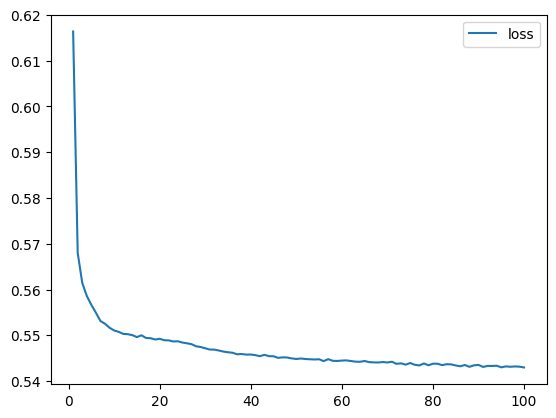

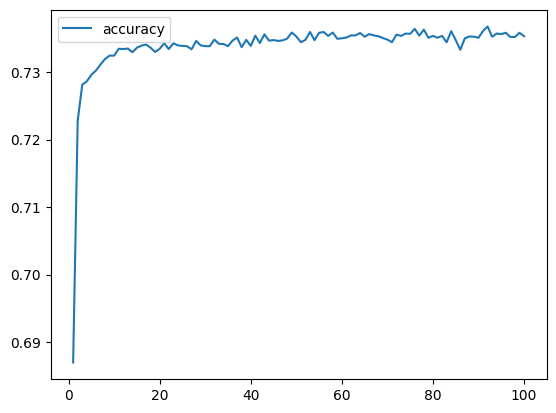

In [ ]:
 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

print()

 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5598 - accuracy: 0.7234 - 464ms/epoch - 2ms/step
Loss: 0.5598090291023254, Accuracy: 0.7233819365501404


268/268 [==============================] - 0s 1ms/step
TRAINING SET METRICS
[[ 8215  3813]
 [ 2969 10727]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71     12028
           1       0.74      0.78      0.76     13696

    accuracy                           0.74     25724
   macro avg       0.74      0.73      0.73     25724
weighted avg       0.74      0.74      0.74     25724


TESTING SET METRICS
[[2671 1339]
 [1033 3532]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      4010
           1       0.73      0.77      0.75      4565

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575



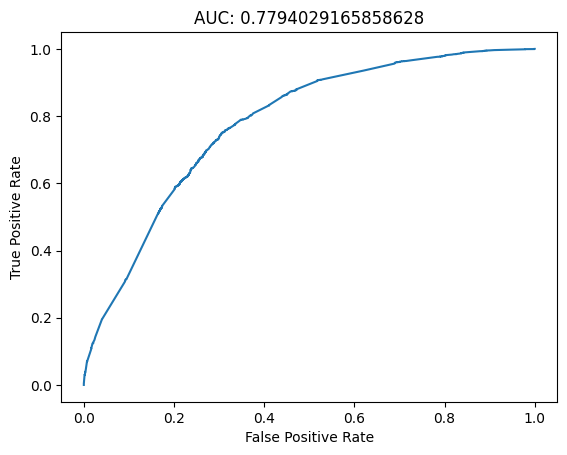

In [ ]:
# predict the model
train_preds = [round(x[0]) for x in nn.predict(X_train_scaled)]
test_preds = [round(x[0]) for x in nn.predict(X_test_scaled)]
test_proba = [x[0] for x in nn.predict(X_test_scaled)]

# make some pretty graphs
print("TRAINING SET METRICS")
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
print()
print("TESTING SET METRICS")
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

# ROC Curve
auc = roc_auc_score(y_test, test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(F"AUC: {auc}")
plt.show()

In [ ]:
# Export our model to HDF5 file
nn.save('nn_first_run.h5')